Este colab fue desarrollado por Arnold Charry Armero.

# Política de Revisión Periódica - Modelos Analíticos

En la práctica, se tienen diferentes políticas de reposición de inventarios. Una de ellas es la de revisión periódica, la cual consiste en pedir una cantidad de tamaño de lote $Q^{*}$ cada cierto intervalo fijo de tiempo $T$. Se tiene que la suma del inventario actual más la cantidad pedida forman el $OUL$, el cual es el inventario que se cuenta para satisfacer la demanda en el periodo $T + L$. Como se cuenta el lead time más el tiempo que se demora en revisar el inventario, el stock de seguridad debe ser mayor para que alcance a satisfacer la demanda en ese periodo de tiempo. En este modelo analítico se determina la cantidad de stock de seguridad para tener cierta tasa $CSL$ de nivel de servicio de ciclo en un $T$ determinado por la administración. Esta política se evidencia mejor con la siguiente imagen.

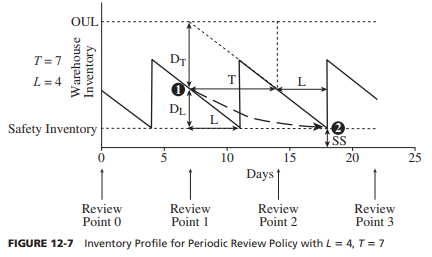

**Supuestos:**

*   Existe uno o varios productos en el sistema de inventarios
*   La demanda es estocástica
*   Se permiten faltantes
*   Hay un tiempo de entrega estocástico
*   Toda la cantidad ordenada llega al mismo tiempo.



Se realizarán los ejemplos dispuestos del libro de Chopra & Meindl con código.

**Ejemplo 12-13**. La demanda semanal de Legos en una tienda Walmart se distribuye normalmente, con una media de 2.500 cajas.
y una desviación estándar de 500. El plazo de reabastecimiento es de dos semanas y el gerente de la tienda ha decidido revisar el inventario cada cuatro semanas. Suponiendo una política de reabastecimiento de revisión periódica, evalúe el inventario de seguridad que debe llevar la tienda para proporcionar un CSL de
90 por ciento. Evalúe el OUL para dicha política.

Teniendo,

$$ D_{T+L}= \left ( T + L \right )D $$

$$ \sigma _{T+L}= \sqrt{T+L}\: \sigma _{D} $$

$$ OUL = D_{T+L}+ss $$

$$ ss= \phi^{-1} (CSL) \:  \sigma_{T+L}$$

$$ Q = D_{T}= D \times T $$

donde,

$ D = \mathrm{Tasa \:de \: demanda \: promedio} $

$ \sigma_{D } = \mathrm{Desviación \: estándar \:de \: la \: demanda \: durante \: el \:tiempo \: de \: entrega} $

$ OUL = \mathrm{Orden \: hasta \: el \: nivel} $

$ ss = \mathrm{Inventario \:de \: seguridad} $

$ L = \mathrm{ Tiempo \: de \:entrega \: (Lead \: Time)} $

$ Q = \mathrm{Cantidad \:de \: lote \: a \: ordenar} $

$ T = \mathrm{Tiempo \:a \: esperar \: para \: revisar \: inventario} $

$ ESC = \mathrm{La \: escasez \: esperada \:por \:ciclo \:de \: reabastecimiento} $

$ \phi (z) = \mathrm{Función \: de \:densidad \: de \: la \: distribución \:normal} $

In [19]:
#Párametros
D = 2500
sigma_D = 500
L = 2
T = 4
CSL = 0.9

In [20]:
def D_TL(D, T, L):
  """
  Demanda durante el tiempo de
  entrega

  Args:
    D: Demanda promedio
    L: Periodos
    T: Tiempo para revisar
    inventario

  Returns:
    D_TL : Demanda durante el
    Lead Time y tiempo de revisión
  """
  return D * (T + L)

In [10]:
def sigma_TL(T, L, sigma_D):
  """
  Calcula la desviación estándar
  durante el tiempo de entrega

  Args:
    sigma_D: Desviación estándar
    de la demanda
    L: Periodos
    T: Tiempo de revisión

  Returns:
    sigma_TL: Desviación estándar
    durante el tiempo de entrega y
    el tiempo de revisión
  """
  import numpy as np
  return np.sqrt(T + L) * sigma_D

In [11]:
def safety_stock_normalized_CSL(CSL, sigma_TL):
  """
  Calcula el stock de seguridad
  para una tasa de abastecimiento

  Args:
    CSL: Porcentaje de disponibilidad
    sigma_TL: Desviación estándar de la
    demanda durante el tiempo de entrega
    y el tiempo de revisión

  Returns:
    ss: Stock de seguridad
  """
  import scipy.stats as st
  z = st.norm.ppf(CSL)
  return z * sigma_TL

In [12]:
def OUL(D_TL, ss):
  """
  Calcula la cantidad disponible
  para satisfacer la demanda y
  stock de seguridad

  Args:
    D_TL: Demanda durante el
    tiempo de entrega y tiempo
    de revisión
    ss: Stock de seguridad

  Returns:
    OUL: Cantidad para satisfacer
    la demanda
  """
  return D_TL + ss

In [13]:
def Q(D, T):
  """
  Calcula el tamaño de lote
  para una demanda en el tiempo
  de revisión

  Args:
    D: Demanda
    T: Tiempo de revisión

  Returns:
    Q: Cantidad de tamaño de
    lote
  """
  return D * T

In [17]:
DTL = D_TL(D, T, L)
print(f"La demanda incluyendo tiempo de revisión y de entrega es de {DTL}")
Sigma_TL = sigma_TL(T, L, sigma_D)
print(f"La desviación estándar incluyendo tiempo de revisión y de entrega es de {round(Sigma_TL)}")

La demanda incluyendo tiempo de revisión y de entrega es de 15000
La desviación estándar incluyendo tiempo de revisión y de entrega es de 1225


In [22]:
print(f"El inventario de seguridad para un nivel de servicio del 90% es {round(safety_stock_normalized_CSL(CSL, Sigma_TL))} unidades")

El inventario de seguridad para un nivel de servicio del 90% es 1570 unidades


In [23]:
print(f"El OUL es de {OUL(DTL, round(safety_stock_normalized_CSL(CSL, Sigma_TL)))} unidades")

El OUL es de 16570 unidades


In [24]:
print(f"El tamaño de lote a ordenar es {Q(D, T)} unidades")

El tamaño de lote a ordenar es 10000 unidades


Las políticas de reabastecimiento de revisión periódica requieren más inventario de seguridad que las políticas de revisión continua para el mismo tiempo de entrega y nivel de disponibilidad del producto.

### Referencias
*   Chopra, S., & Meindl, P. (2016). Supply chain management: Strategy, planning, and operation, global edition (6th ed.). Pearson Education.
*   Pulido, H. G. (2007). Control estadístico de calidad y Seis Sigma.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.
*   Sipper, D., & Bulfin, R. L. (1998). Planeación y control de la producción.
*   Zill, D. G. (2000). Cálculo de una variable: trascendentes tempranas (4a. ed.).